## Week 8-2: Nonparametric regression with splines 

_Bo Y.-C. Ning_

#### Last time
* Dirichlet process
* Dirichlet process mixtures model

#### Today
* Spline functions

#### Reference
* Ch5 of ELS
* ChE of GvdVNP
* Dimatteo, Genovese, and Kass (2001). Bayesian curve-fitting with free knots splines. _Biometrika_ 88:1055--1071.

### Splines function

Consider the regression model 
$$
Y_i = f(X_i) + \varepsilon_i, 
$$
where $\varepsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2)$. The goal is to find a good approximation to the underlying true function that can estimate $f$, and we do not want to make the assumption that $f$ is linear in $X$. Splines function serves this purpose quite well. 

#### Piecewise polynomials

From example (the same one from Ch 5.2 of ELS), to estimate $f$, one divides the domain of $x$ into several continuous intervals and then estimate $f$ by fitting a piecewise polynomial function in each interval. 

<img src="splines.png" width=80%>  

                                             Source: Page 142 of ELS


* _Piecewise constant_: Fit function in each interval a piecewise constant function:

$$
h_1(x) = \mathbb{1}(x < \zeta_1), \quad 
h_2(x) = \mathbb{1}(\zeta_1 \leq x < \zeta_2), \quad
h_3(x) = \mathbb{1}(x \geq \zeta_3).
$$

* _Piecewise linear_: The three polynomial functions are $h_{m+3}(x) = h_m(x) x$, $m = 1, 2, 3$

* _Continuous piecewise linear_: We typically want the knots to be continous. The continuous piecewise linear function imposes the restriction: $\beta_1 + \zeta_1 \beta_4 = \beta_2 +\zeta_1\beta_5$. This implies $f(\zeta_1^-) = f(\zeta_1^+)$. Simliarly, we let $f(\zeta_2^-) = f(\zeta_2^+)$. Since there are two restrictions, the number of free parameters is four. 

A more direct way is to proceed using a basis that incoporates the constraints:

$$
h_1(x) = 1, \quad h_2(x) = x, \quad h_3(x) = (X - \zeta_1)_+, \quad h_4(x) = (x - \zeta_2)_+, 
$$
there $t_+$ denotes the positive part. 

We often perfer smoother functions, and these can be achieved by increasing the order of the local polyonomial. 

* _Cubic splines_: We enforce one more order of continuity by choosing the following basis:
$$
h_1(x) = 1, \quad h_2(x) = x, \quad, h_3(x) = x^2, \quad h_4(x) = x^3, \quad h_5(x) = (x - \zeta_1)_+^3, \quad h_6(x) = (x - \zeta_2)_+^3. 
$$

#### B-splines

We introduce _B-splines_, which is short for _basis splines_. For $x \in [0,1]$, denote the set of B-splines $B_{0,q}, B_{1,q}, \dots, B_{J-1,q}$, $q$ is the order and $J - 1$ is the total number of knots. In each subinterval, $f$ is a polynomial of degree at most $q-1$. 

For example, if $q = 1$, B-splines functions are piecewise constant functions $\mathbb{1}\{\zeta_j \leq X \leq \zeta_{j+1}\}$ for $j = 0, 1, \dots, J-1$, $\zeta_0 = 0$ and $\zeta_J = 1$. Knots are located at $\zeta_1, \dots, \zeta_{J-1}$. 

For $q = 2$, the basis functions are tent functions:

\begin{align*}
B_{j, 2} = 
\begin{cases}
& \frac{x - \zeta_j}{\zeta_{j+1} - \zeta_j}, \quad x \in [\zeta_j, \zeta_{j+1}),\\
& \frac{\zeta_{j+2} - x}{\zeta_{j+2} - \zeta_{j+1}}, \quad x \in [\zeta_{j+1}, \zeta_{j+2}), \ j = -1, 0, \dots, K-1,\\
& 0 \quad \text{otherwise}
\end{cases}
\end{align*}

In general, for B-splines of order $q$, define an extended knot sequence, with 0 and 1 are deliberately repeated $q$ times, as 
$$
\underbrace{0, \dots, 0}_{q \ \text{times}}, \zeta_1, \dots, \zeta_{K-1}, \underbrace{1, \dots, 1}_{q\ \text{times}}
$$
Then B-splines of order $q$ can be written in terms of lower order ones as 

$$
B_{j,q}(x) = \frac{x - \zeta_j}{\zeta_{j+q-1} - \zeta_j} B_{j, q-1}(x) + \frac{\zeta_{j+q} - x}{\zeta_{j+q} - \zeta_{j+1}} B_{j+1, q-1}(x),
$$
for $j = -q+1, \dots, K-1$.

<img src="B-spline.png" width=90%>  

                                            (Source: Page 551 of GvdVNP)
                                            
                                            
Then given a fixed value of $q$ (e.g., $q = 4$, cubic spline), we denote the spline functions $B_1, \dots, B_J$ for simplicity, then we model 
$$
g(x; J, \theta) =  \sum_{j=1}^J \theta_j B_j(x) := B(x) \theta.
$$

Assuming Gaussianity, the goal is to estimate $\theta$ and $\sigma^2$ from $Y_i \sim N(B(X_i) \theta, \sigma^2)$.

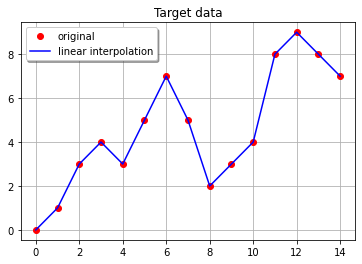

In [1]:
# source: https://www.datatechnotes.com/2021/11/b-spline-fitting-example-in-python.html

from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np 

y = [0,1,3,4,3,5,7,5,2,3,4,8,9,8,7]
n = len(y)
x = range(0, n) 

plt.plot(x, y, 'ro', label="original")
plt.plot(x, y, 'b', label="linear interpolation")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()

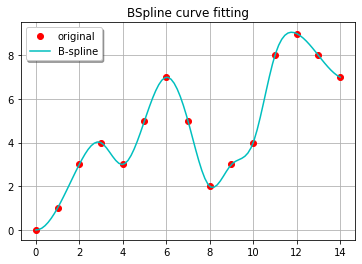

In [2]:
tck = interpolate.splrep(x, y, s=0, k=3) 
x_new = np.linspace(min(x), max(x), 100)
y_fit = interpolate.BSpline(*tck)(x_new)

plt.title("BSpline curve fitting")
plt.plot(x, y, 'ro', label="original")
plt.plot(x_new, y_fit, '-c', label="B-spline")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

### Nonparametric regression using B-spline functions

#### Background

The choice $J$ plays an important role in approximating $f_0$, consider fitting the Old Faithful Geyser Data using cubic spline. The data contains 272 observation and two variables: waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park. The figure below shows four different fitted curved using B-splines with $J = 2, 10, 20, 30$. 

<img src="choiceJ.png" width=90%> 


We observe again the bias-variance tradeoff phenomenon. If $J$ is too small, then bias is large and variance is small. We miss some relevant relations. This is the _underfitting_ case. In contrary, if $J$ is too large, bias is small but variance is large. This is the _overfitting_ case. 

Ideally, one would choose $J \asymp n^{1/(2\alpha+1)}$. This is because we approximate the function with $J$ polynomials, the MSE is of the order $J/n$. On the other hand, approximation theory tells us the bias for estimating $f$ using the truncation is of the order $J^{-\alpha}$. This leads to 

$$
J^{-2 \alpha} \asymp \frac{J}{n}.
$$

Here, $\alpha$ describes the smoothness of $f$ or the number of times $f$ is differentiable. Solving $J$ leads to the optimal value. By plugging-in the optimal value for $J$, the MSE is of the order $n^{-2\alpha/(2\alpha+1)}$. This implies the convergence rate for estimating the function is of the order $n^{-\alpha/(2\alpha+1)}$. 

However, in practice, one does not know $\alpha$. Choosing the optimal value for $J$ is unclear. 

#### Smoothing spline via regularization

A popular method is to choose the knots at $X_1, \dots, X_n$ (a maximal set of knots) and then control the complexity of the fit using regularization. In this way, one avoids choosing the number of knots. The objective function is given by 

$$
\mathcal{L}(g, \lambda) = \frac{1}{n} \sum_{i=1}^n (Y_i - g(X_i; \theta))^2 + \lambda \int \big(g''(x) \big)^2 dx.
$$

The goal is to minimize the objective function, which is the penalized residual sum of squares, by choosing $\lambda$ and estimating $\theta$.  
The tuning parameter $\lambda$ is the _smoothing parameter_, which penalizes curvature in the function. 

- When $\lambda \to 0$, $f$ is any function that interploates the data
- When $\lambda \to \infty$, $f$ is simply the least squares line as no second derivative can be tolerated. 

Therefore, by moving $\lambda$ from 0 to $\infty$, the function varies from very rought to very smooth. 

By writting $g(X_i; \theta) = B(X_i) \theta$ and note that $g''(x) = B''(x) \theta$, the objective function can be written as 

$$
\mathcal{L}(g, \lambda) = \|Y - B \theta\|^2 + \lambda \theta' \Omega \theta,
$$
where $\Omega_{jk} = \int B_j^{''}(x) B_k^{''}(x) dx$. 

Minimizing the objective function, we obtain 
$$
\hat \theta = (B'B + \lambda \Omega)^{-1} B'Y
$$

#### Choosing $\lambda$

One could minimize the integrated squared prediction error EPE$(\lambda)$, which is defined as follows:

\begin{align}
    \text{EPE}(\hat f_\lambda) & = \mathbb{E} (Y - \hat f_\lambda(X))^2\\
    & = \text{Var}(Y) + \mathbb{E}\big[\text{Bias}^2(\hat f_\lambda(X)) + \text{Var}(\hat f_\lambda(X) \big]\\
    & = \sigma^2 + \text{MSE}(\hat f_\lambda).
\end{align}

But we do not know the true function, so we do not have access to EPE, and need an estimate. One can select $\lambda$ using cross-validation. For example, the leave-one out CV and K-fold CV. 

<img src="cv.png" width=80%>  

                                               Source: Page 159 of ESL

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import LeaveOneOut
from scipy.interpolate import BSpline
from scipy.signal import detrend

from sklearn.datasets import load_boston
from scipy import interpolate

In [3]:
boston = load_boston()
y = boston.target
x = np.arange(0, len(y), 1)

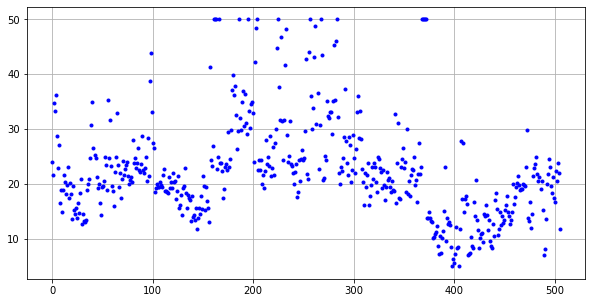

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, '.', c="b")
plt.grid()
plt.show()

In [5]:
def knot_points(nKnots, x, degree):
#create the knot locations    
    knots = np.linspace(x[0], x[-1], nKnots) 
    
    lo = min(x[0], knots[0]) #we have to add these min and values to   conform by adding preceding and proceeding values
    hi = max(x[-1], knots[-1])
    augmented_knots = np.append(np.append([lo]*degree, knots), [hi]*degree)
    return augmented_knots

In [6]:
nknots = 10
degree = 3
k=degree
DOF = nknots + degree +1
augmented_t = knot_points(nknots, x, degree)

In [218]:
bs2 = BSpline(augmented_t, np.eye(DOF), degree, extrapolate=False) #setting up the basis
B = bs2(x)[:,:-2] #Creating the basis for x & getting rid of extra column of zeroes from padding for order
# Least square estimation
x_proj_matrix = B@np.linalg.inv(B.T@B)@B.T
coeff = np.linalg.lstsq(B, y.T,rcond=-1)[0].T
yhat = B@coeff
n = x.shape[0]
K = np.trace(x_proj_matrix)
sigma2 = (1/(n-K))*(y-yhat).T@(y-yhat) #SSE/(n-p)
width = np.diag(sigma2*x_proj_matrix)**0.5
y_neg_ci = yhat - 1.96*width
y_pos_ci = yhat + 1.96*width

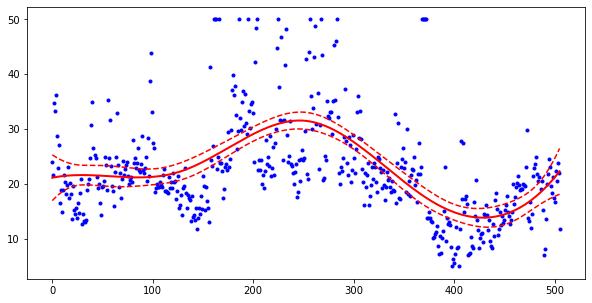

In [219]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, '.', c="b")
plt.plot(x, yhat, c = "r", linewidth = 2)
plt.plot(x, y_neg_ci, c = "r", linestyle = "--")
plt.plot(x, y_pos_ci, c = "r", linestyle = "--")
plt.show()

What is going on with the confidence intervals? 

#### Confidence band for splines

The simultaneous confidence band has a converage probability $1-\alpha$ (usually 95%) satisfies 

$$
P(\hat f(x) - C_\alpha(x) \leq f(x) \leq \hat f(x) + C_\alpha(x), \text{for all $x$}) = 1 - \alpha.
$$
Equivelantly, 
$$
P(\|\hat f(x) - f(x)\|_\infty \leq C_\alpha(x)) = 1 - \alpha.
$$

To obtain the 95\% simultaneous confidence band, we can use bootstrap. The method goes like this: after selecting $\lambda$ using cross-validation, we resample the whole data points with replacement $B$ times. Each time, we obtain a spline fitted curve, and in total, we get $B$ of them. Since the values of $x$ and $y$ will change from simulation to another, we evaluate each spline function on the same (fixed) grid of points. To obtain the 95% confidence band, we keep the 0.95B curves that are closest to the mean. 


#### Bayesian approach

A Bayesian treats the number of knots and their locations as unknown parameters. So the unknown parameters in this model are $\theta$, $\sigma^2$, $\zeta = (\zeta_1, \dots, \zeta_{J-1})$, and $J$.

Then the prior distribution is given by 
$
\pi(\theta, \sigma^2, J, \zeta),
$
and we decompose it as 

$$
\pi(\theta, \sigma^2, J, \zeta) = \pi(\theta | \sigma^2, J, \zeta) \pi(\zeta | J) \pi(J) \pi(\sigma^2).
$$

We choose

- $\theta | \sigma^2, J, \zeta \sim N(0, \sigma^2 n (B_{J,\zeta}' B_{J, \zeta})^{-1})$;

- $\zeta | J \sim \text{Dir}(1, \dots, 1)$ (uniform);

- $J \sim \text{Poisson}(\tau)$;

- $\sigma \sim 1/\sigma$ (noninformative prior) or a conjugate prior.

Then we apply reversible-jump mcmc to sample draws from each conditional posterior distribution.

#### Multidimensional splines

So far, we have focused on estimating one-dimensional function. Suppose $x \in \mathbb{R}^2$, we have a set of basis functions $h_{1j}(x_1)$, $j = 1, \dots, J$ for coordinate $x_1$ and another set of basis functions $h_{2k}(x_1)$, $k = 1, \dots, K$ for coordinate $x_2$, then we define the $J \times K$ dimensional tensor product basis as 
$$
g_{jk}(x) = h_{1j}(x_1) h_{2k}(x_2),
$$
for $j  = 1, \dots, J$ and $k = 1, \dots, K$. 

Then the mean function is denoted by
$$
g(x) = \sum_{j=1}^J \sum_{k=1}^K \theta_{jk} g_{jk}(x)
$$

The penalized objective function becomes

$$
\mathcal{L}(g, \lambda) = \frac{1}{n} \sum_{i=1}^n (Y_i - g(X_i; \theta))^2 + \lambda J[g] dx,
$$
where 
$$
J[g] = \int \int \Big[
\frac{\partial^2 g(x)}{\partial x_1^2} + \frac{\partial^2 g(x)}{\partial x_1 \partial x_2} + 
\frac{\partial^2 g(x)}{\partial x_2^2}
\Big]dx_1 dx_2.
$$

Simular to the one-dimensional case, if $\lambda \to 0$, then the solution is just interpolating data; if $\lambda \to \infty$, then the solution is the least square plane. For $\lambda$ takes intermediate values, the solution can be represented as a linear expansion of basis functions, whose coefficients are obtained by a form of generalized ridge regression. 

For choosing $J$ and $K$. Suppose the smoothness of the function in each dimension is the same, denoted by $\alpha$, let $J = K$, the approximation error is bounded by $J^{-\alpha/2}$, then let $J^{-\alpha} \asymp \frac{J}{n}$ leads to the optimal choice of $J$ is $n^{1/(\alpha+1)}$. This suggest the convergence rate is $n^{-\alpha/(2\alpha+2)}$. In general, for a $d$-dimensional function, the optimal choice of $J$ is of the order $n^{d/(2\alpha+d)}$, and the convergence rate is $n^{-\alpha/(2\alpha+d)}$.
Again, due to $\alpha$ is unknown, one can choose $J$ using cross-validation in practice. 